# Educational Attainment Distribution

An exploration of levels of education among the general population in various countries.

To download the data, visit the [Wittgenstein Centre Human Capital Data Explorer](http://dataexplorer.wittgensteincentre.org/wcde-v2/). In the Indicator dropdown menu, select Educational Attainment Distribution by Broad Age. Select all countries, all years, age 15+, and the Medium (SSP2) scenario.

- Date: 2019-01-23
- Source: [Wittgenstein Centre for Demography and Global Human Capital](http://dataexplorer.wittgensteincentre.org/wcde-v2/)

## Setup

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from src.plot import ds_plot

%config InlineBackend.figure_format = 'retina'

# Custom chart style
if 'datastory' in plt.style.available:
    plt.style.use('datastory')

In [2]:
df = pd.read_csv('../data/raw/educational_attainment.csv', skiprows=8)

## Overview

In [3]:
df.sample(3)

,Area,Year,Age,Education,Distribution
38600,Guyana,2070,15+,Post Secondary,19.9
44634,Bosnia and Herzegovina,2045,15+,Master and higher,2.4
31291,Channel Islands,2045,15+,Upper Secondary,33.8


In [4]:
# Unique levels of education
df.Education.value_counts()

Primary                 6054
Lower Secondary         6054
Upper Secondary         6054
No Education            6054
Post Secondary          6054
Under 15                6054
Incomplete Primary      6054
Short Post Secondary    1062
Master and higher       1062
Bachelor                1062
Name: Education, dtype: int64

In [5]:
# Time extent of the data
df.Year.min(), df.Year.max()

(1950, 2100)

## Plotting

In [6]:
def reshape_country(df, country, year_max=2050):
    cols = ['No Education', 'Incomplete Primary', 'Primary',
            'Lower Secondary', 'Upper Secondary', 'Post Secondary']

    colors = list(reversed(['#2bbaff', '#ffaa8c', '#ff713f', '#5d1800']))

    # Transform the data
    data = (df
        .query(f'Area == "{country}" & Year <= {year_max}')
        .drop(['Area', 'Age'], axis=1)
        .pivot_table(columns='Education', values='Distribution', index='Year')
        .filter(items=cols)
        .assign(Primary=lambda x: x['Primary'] + x['Lower Secondary'])
        .drop(['Lower Secondary', 'Incomplete Primary'], axis=1))
    
    # Convert absolute numbers to percentages
    data = data.apply(lambda x: x / data.sum(axis=1)) * 100
    
    return data

In [7]:
def plot_country(data):
    """Plot stacked area chart for `country`."""

    fig, ax = ds_plot(figsize=(14.4, 5.8))
    colors = list(reversed(['#2bbaff', '#ffaa8c', '#ff713f', '#5d1800']))
    ax = data.plot(kind='area',
                   stacked=True,
                   color=colors,
                   ax=ax,
                   legend=False)
    
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
    ax.set_xlim(1970, 2050)
    ax.set_ylim(0, 100)
    ax.set_xlabel('')
    ax.set_yticks([0, 25, 50, 75, 100], minor=False)
    ax.grid(axis='y', which='major')
    ax.axvline(2019, ls='--', lw=3, color='#404041')
    fd = {'size': 14, 'weight': 500, 'color': '#404041', 'backgroundcolor': '#ff713f'}
    ax.text(2018, 50, 'Dagens läge', ha='right', va='center', fontdict=fd)

    plt.gcf().set_facecolor('white')

    return ax

In [8]:
data = df.pipe(reshape_country, 'China'); data.head()

Education,No Education,Primary,Upper Secondary,Post Secondary
Year,,,,
1950,74.301676,24.357542,1.117318,0.223464
1955,67.044168,30.804077,1.812005,0.339751
1960,58.857143,37.714286,2.857143,0.571429
1965,49.770115,44.827586,4.482759,0.919540
1970,40.484429,51.557093,6.574394,1.384083


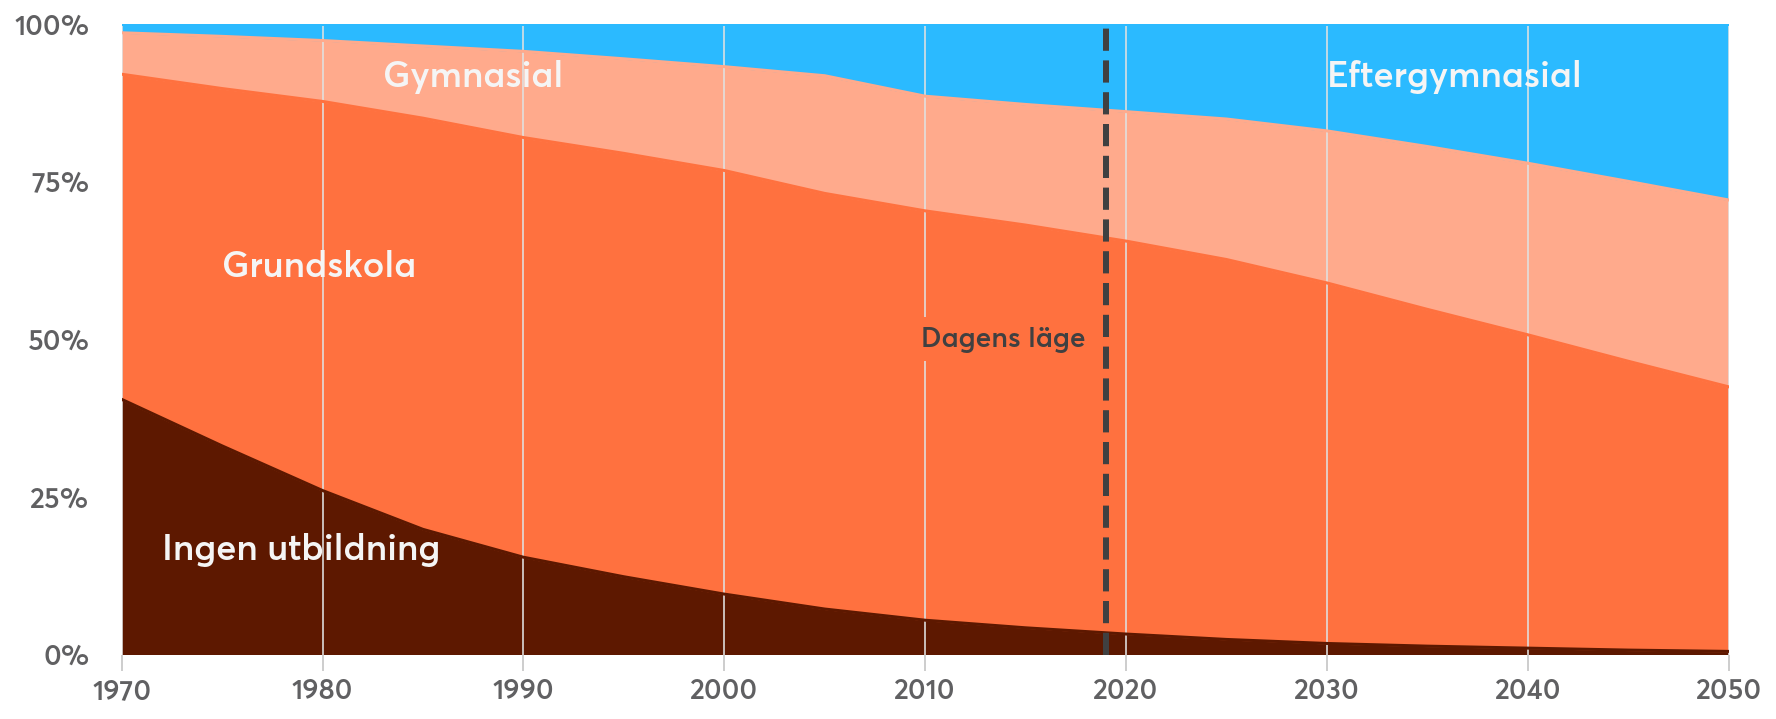

In [9]:
ax = plot_country(data)

fd = {'size': 18, 'weight': 500, 'color': '#f5f5f5'}

# Manually add annotations
ax.text(2030, 90, 'Eftergymnasial', fontdict=fd)
ax.text(1983, 90, 'Gymnasial', fontdict=fd)
ax.text(1975, 60, 'Grundskola', fontdict=fd)
ax.text(1972, 15, 'Ingen utbildning', fontdict=fd)

fig = plt.gcf()
fig.set_facecolor('#ffffff')
fig.savefig('../charts/educational-levels.png')